# Assignment 2: Airbnb - Exploring Pandas

Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking (Wikipedia 2023).

For these exercises, we use original data from Airbnb for Boston that have been collected in December 2017 by the Airbnb API. The data shows some properties of Boston's real estate listings:

- Host information: year of registration, location, about, response time, response rate, acceptance rate, „is superhost“, total listings (number of accommodations), verifications, „has profile pic“, „identity verified“
- Location: Latitude, Longitude
- Property: property type, room type, accommodates, bathrooms, bedrooms, beds, price, security deposit, cleaning fee, guests included, extra people, min. nights, max. nights ,...
- Reviews: number of reviews, various reviews score, reviews per month

Let's exercise pandas and explore the airbnb data?


## 1) Import Pandas

In [3]:
import pandas as pd

## 2) Read in the Airbnb Data with Pandas

Use the .read_ecxel() function of pandas to import the airbnb data.

Hint: please double check whether google drive has been connected.

In [4]:
airbnb = pd.read_excel('https://github.com/casbdai/datasets/raw/main/Module2/Onboarding/PrepTask/airbnb.xlsx')

## 3) Explore Size of Data Set

Use the .head() and .info() methods on the airbnb-DataFrame.

How many Instances and Features has the airbnb data set?
What data types are present in the data set? What is a data type of type object?


In [5]:
# using head()
airbnb.head()

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month
0,2016,100,0,1,1,1,42.274980,-71.139690,Private room,2,...,8,10,10,8,8,8,1,0,1,179
1,2016,100,1,1,1,0,42.276364,-71.136433,Private room,2,...,10,10,10,10,9,10,0,0,1,436
2,2017,100,0,2,1,0,42.290783,-71.137955,Private room,2,...,10,8,10,10,9,10,1,0,2,73
3,2016,100,0,4,1,0,42.276677,-71.135082,Private room,2,...,10,10,10,10,9,9,0,0,4,65
4,2015,0,0,1,1,1,42.287598,-71.134482,Private room,4,...,10,10,10,10,10,10,0,0,1,66


In [6]:
# using info()
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      2351 non-null   int64  
 1   host_response_rate              2351 non-null   int64  
 2   host_is_superhost               2351 non-null   int64  
 3   host_listings_count             2351 non-null   int64  
 4   host_has_profile_pic            2351 non-null   int64  
 5   host_identity_verified          2351 non-null   int64  
 6   latitude                        2351 non-null   float64
 7   longitude                       2351 non-null   float64
 8   room_type                       2351 non-null   object 
 9   accommodates                    2351 non-null   int64  
 10  bathrooms                       2351 non-null   int64  
 11  bedrooms                        2351 non-null   int64  
 12  beds                            23

Number of features: 34

Number of instances: 2351

The dataframe consists of following data types: float64, int64, object

The data object/s is/are mixed: they can be either a string or a number(integer or float)


## 4) Selecting the Feature "price"

Select the variable "price" and select it in the screen

In [7]:
# select the variable "price" from the airbnb dataframe
airbnb["price"]

0        60
1        45
2        65
3        69
4        50
       ... 
2346    159
2347     75
2348    110
2349    150
2350     75
Name: price, Length: 2351, dtype: int64

In [8]:
# select the variables "price" and "room_type" (use a list...) and the first 3 rows from the airbnb dataframe
airbnb.loc[:2,["price", "room_type"]]

,price,room_type
0,60,Private room
1,45,Private room
2,65,Private room


In [9]:
# select the first three features as well as rows 31 to 33 from the airbnb dataframe
airbnb.iloc[31:34,:3]

,host_since,host_response_rate,host_is_superhost
31,2013,0,0
32,2015,100,0
33,2015,100,0


## 5) Creating and deleting new variables

Create a new variable revenues per year.

In [10]:
# create a feature "number_of_years" by subtracting "first_review" from "last_review"
airbnb["number_of_years"] = airbnb["last_review"] - airbnb["first_review"]

# inspect results
airbnb.loc[:, ["number_of_years","last_review","first_review"]]

,number_of_years,last_review,first_review
0,0,2017,2017
1,1,2017,2016
2,0,2017,2017
3,0,2017,2017
4,0,2016,2016
...,...,...,...
2346,0,2017,2017
2347,0,2017,2017
2348,0,2017,2017
2349,0,2017,2017


Inspect the results: Why are there so many zeros in the output? What do they mean?

Answer: The full year, and not days or months, are being subtracted. As many of the instances have the same value for first and last review, there are many zeros for the newly calculated feature.

In [11]:
# add 1 to your newly created variable "number_of_years" in order to fix that
airbnb["number_of_years_plus_1"] = airbnb["number_of_years"]+ 1

# inspect results
airbnb.loc[:, ["number_of_years_plus_1","last_review","first_review"]]

,number_of_years_plus_1,last_review,first_review
0,1,2017,2017
1,2,2017,2016
2,1,2017,2017
3,1,2017,2017
4,1,2016,2016
...,...,...,...
2346,1,2017,2017
2347,1,2017,2017
2348,1,2017,2017
2349,1,2017,2017


In [12]:
# create a variable "reviews_per_year"
airbnb["reviews_per_year"] = airbnb["reviews_per_month"] * 12

# inspect results
airbnb.loc[:, ["reviews_per_year","reviews_per_month"]]

,reviews_per_year,reviews_per_month
0,2148,179
1,5232,436
2,876,73
3,780,65
4,792,66
...,...,...
2346,2004,167
2347,3060,255
2348,2172,181
2349,2004,167


## 5) Summary Statistics

Pandas provides a series of useful functions for performing exploratory data analysis. Apply the method .mean() on the airbnb dataframe

What is the output?

In [13]:
# apply .mean() on airbnb()
airbnb.mean(skipna=True, numeric_only=True)

host_since                        2014.505317
host_response_rate                  83.350915
host_is_superhost                    0.204594
host_listings_count                 41.013186
host_has_profile_pic                 0.998724
host_identity_verified               0.584007
latitude                            42.340226
longitude                          -71.084592
accommodates                         3.190132
bathrooms                            7.794981
bedrooms                             1.275627
beds                                 1.712888
price                              161.270523
security_deposit                   115.369205
cleaning_fee                        47.781795
guests_included                      1.547001
extra_people                        12.962144
minimum_nights                       3.074436
maximum_nights                     788.335177
number_of_reviews                   27.220332
first_review                      2015.977031
last_review                       

The output describes: the average (mean) of each numerical feature of the dataframe

Now, calculate the mean, median, and the standard deviation of the feature "price".

Hint: Select the variable price and apply the mean method on that variable selection.

What is the difference of the three measures?

In [14]:
# calculate the mean price
airbnb["price"].mean()

161.27052318162484

In [15]:
# calculate the median price
airbnb["price"].median()

139.0

In [16]:
# calculate the standard deviation for price
airbnb["price"].std()

142.6317710232034

The difference between the three measures is each calculates a different aggregate for "price"
*Remark: unclear question*

## 6) Plotting


Create a scatterplot for the variables "price" and "number_of_reviews" . How would you interpret the results?

<Axes: xlabel='price', ylabel='number_of_reviews'>

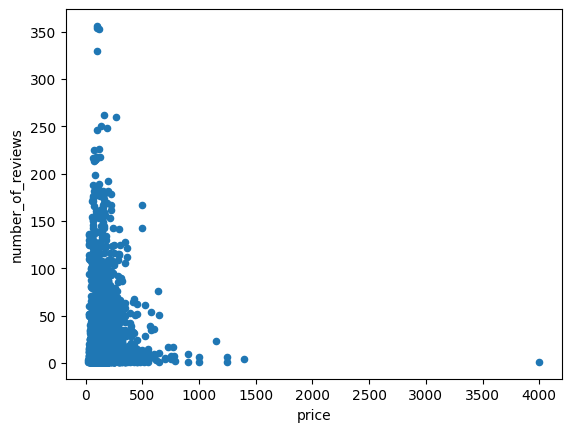

In [17]:
import matplotlib.pyplot

# create scatterplot
airbnb.plot(kind="scatter", x="price", y="number_of_reviews")

Your interpretation: there is a weak correlaation between price and number of reviews.

Create a scatterplot for the variables longitude and latitude. How would you describe the results now? Hint: The data is from Boston....

There is a strong correlation between the variables longitude and latitude. This can mean that the data set is focussed on a particular city or area.

<Axes: xlabel='longitude', ylabel='latitude'>

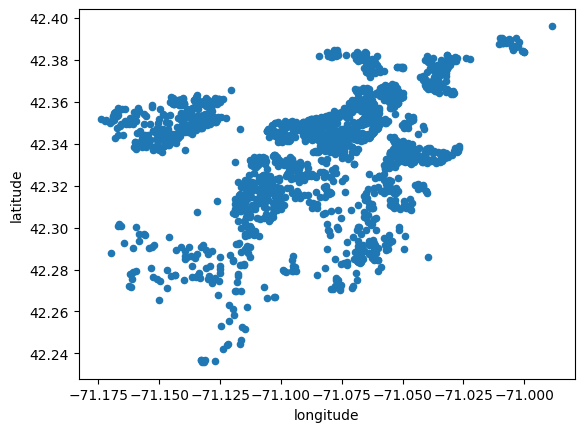

In [18]:
# create scatterplot
airbnb.plot(kind="scatter", x="longitude", y="latitude")

## 7) Subsetting Data


Select all instances which have more than 0 reviews

In [21]:
airbnb[airbnb["number_of_reviews"] > 0 ]
# check
airbnb["number_of_reviews"].min()

1

Select all instances which are of "room_type" "Shared room" or "Private room".

Save the results to a new dataframe "airbnb_small" and use the info() method on this new dataframe. What has changed in comparison to the original airbnb dataframe?
Answer: there is only one feature.

In [20]:
# Select room types "Shared room" and "Private Room" and assign results to a new dataframe
airbnb_small = airbnb.room_type.isin(["Shared room", "Private room"])

#apply .info() method on new dataframe
airbnb_small.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2351 entries, 0 to 2350
Series name: room_type
Non-Null Count  Dtype
--------------  -----
2351 non-null   bool 
dtypes: bool(1)
memory usage: 2.4 KB
